In [18]:
# Data obtained from https://www.histdata.com/download-free-forex-historical-data/?/ascii/1-minute-bar-quotes/EURUSD
# https://github.com/hayatoy/ml-forex-prediction/blob/master/Predict%20Future%20Price%20of%20EURUSD%20with%20sklearn%2C%20yahoo%20data.ipynb
# https://github.com/PacktPublishing/Machine-Learning-for-Algorithmic-Trading-Bots-with-Python/blob/master/Lecture%20Notebooks/Lectures%20Notebooks/section%200002/SEC002%20VID002%20Build%20and%20Implement%20Random%20Forests%20Algorithm.ipynb

CONTRACTS = 10000.0
COMMISSION = 0.0001
TRAIN_TICK_LENGTH = 50 # Per training sample, we have 40 ticks
PREDICT_TICK_LENGTH = 15 # Per prediction, we want to predict 7 ticks

# 40, 7 has profit factor of 1.28
# 40, 10 has profit factor of 1.35
# 40, 11 has profit factor of 1.34
# 40, 12 has profit factor of 1.35
# 40, 15 has profit factor of 1.42
# 40, 20 has profit factor of 1.2
# 50, 15 has profit factor of 1.6

In [2]:
import pandas as pd
import numpy as np

def pandas_data_loader(file_name):
    df = pd.read_csv(file_name, sep=";", header=None)
    df.columns = ["date", "open", "high", "low", "close", "volume"]
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d %H%M%S")
    df.set_index("date", inplace=True)

    # drop everything apart from close
    df.drop(["open", "high", "low", "volume"], axis=1, inplace=True)

    # add 40 ticks in future as features
    for d in range(1, TRAIN_TICK_LENGTH):
        col = "%dd" % d
        df[col] = df['close'].shift(-1 * d)

    # now remove last 40 since they do not have future ticks
    df.dropna(inplace=True)

    return df

In [3]:
# load data
df = pandas_data_loader("eurusd/DAT_ASCII_EURUSD_M1_2022/DAT_ASCII_EURUSD_M1_2022.csv")
df.tail()

,close,1d,2d,3d,4d,5d,6d,7d,8d,9d,...,40d,41d,42d,43d,44d,45d,46d,47d,48d,49d
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30 16:05:00,1.07043,1.07033,1.07038,1.07035,1.07032,1.07030,1.07035,1.07032,1.07032,1.07033,...,1.07025,1.07028,1.07027,1.07031,1.07031,1.07015,1.07010,1.07006,1.06997,1.07001
2022-12-30 16:06:00,1.07033,1.07038,1.07035,1.07032,1.07030,1.07035,1.07032,1.07032,1.07033,1.07035,...,1.07028,1.07027,1.07031,1.07031,1.07015,1.07010,1.07006,1.06997,1.07001,1.07001
2022-12-30 16:07:00,1.07038,1.07035,1.07032,1.07030,1.07035,1.07032,1.07032,1.07033,1.07035,1.07033,...,1.07027,1.07031,1.07031,1.07015,1.07010,1.07006,1.06997,1.07001,1.07001,1.07008
2022-12-30 16:08:00,1.07035,1.07032,1.07030,1.07035,1.07032,1.07032,1.07033,1.07035,1.07033,1.07030,...,1.07031,1.07031,1.07015,1.07010,1.07006,1.06997,1.07001,1.07001,1.07008,1.07030
2022-12-30 16:09:00,1.07032,1.07030,1.07035,1.07032,1.07032,1.07033,1.07035,1.07033,1.07030,1.07031,...,1.07031,1.07015,1.07010,1.07006,1.06997,1.07001,1.07001,1.07008,1.07030,1.07054


In [4]:
from sklearn.model_selection import train_test_split

# we want to predict 7 ticks ahead
X = df.iloc[:, :TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH]
y = df.iloc[:, TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
y_test.head()

,35d,36d,37d,38d,39d,40d,41d,42d,43d,44d,45d,46d,47d,48d,49d
date,,,,,,,,,,,,,,,
2022-07-08 11:07:00,1.01801,1.01842,1.01858,1.01825,1.01826,1.01831,1.01773,1.01736,1.01746,1.01772,1.01777,1.01798,1.01783,1.01784,1.01771
2022-08-11 09:18:00,1.03618,1.03617,1.03621,1.03605,1.03585,1.03576,1.03588,1.03597,1.03577,1.03592,1.03593,1.03603,1.03594,1.03593,1.03562
2022-11-21 23:56:00,1.02517,1.02509,1.02505,1.02504,1.02475,1.02488,1.02478,1.02471,1.02459,1.02490,1.02485,1.02486,1.02490,1.02496,1.02505
2022-04-27 15:15:00,1.05545,1.05545,1.05556,1.05575,1.05550,1.05556,1.05563,1.05581,1.05575,1.05582,1.05584,1.05575,1.05594,1.05579,1.05575
2022-10-31 00:06:00,0.99541,0.99545,0.99540,0.99530,0.99535,0.99531,0.99520,0.99485,0.99460,0.99479,0.99479,0.99481,0.99479,0.99478,0.99466


In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True,
    n_jobs=16,
    random_state=None,
    verbose=1,
    warm_start=False)

regressor.fit(X_train, y_train)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   26.7s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestRegressor(n_jobs=16, oob_score=True, verbose=1)

In [124]:
import matplotlib.pyplot as plt

def evaluate_model(regressor, X_test, y_test, show_results=True):
    y_predicted = regressor.predict(X_test)

    LAST_PRED_COL = "p" + str(TRAIN_TICK_LENGTH - 1) + "d"                    # e.g. p39d
    ACTUAL_COL = str(TRAIN_TICK_LENGTH - 1) + "d"                             # e.g. 39d
    LAST_KNOWN_COL = str(TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 1) + "d"   # e.g. 32d

    # used for fractals
    LAST_2_KNOWN_COL = str(TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 2) + "d" # e.g. 31d
    LAST_3_KNOWN_COL = str(TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 3) + "d" # e.g. 30d
    LAST_4_KNOWN_COL = str(TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 4) + "d" # e.g. 29d
    LAST_5_KNOWN_COL = str(TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 5) + "d" # e.g. 28d
    
    # load in y_predicted into new pandas df
    y_predicted_df = pd.DataFrame(y_predicted, index=y_test.index, columns=y_test.columns)
    y_predicted_df.head()
    # change columns to begin with p
    y_predicted_df.columns = ["p" + str(col) for col in y_predicted_df.columns]

    # reduce y_predicted to just last columm
    y_predicted_df = y_predicted_df[[LAST_PRED_COL]]
    # reduce y_test to just last column
    y_test = y_test[[ACTUAL_COL]]
    # reduce X_test to just last column and the 4 before it
    X_test = X_test[[LAST_5_KNOWN_COL, LAST_4_KNOWN_COL, LAST_3_KNOWN_COL, LAST_2_KNOWN_COL, LAST_KNOWN_COL]]

    # now merge x_test and y_predicted_df
    merged_df = pd.merge(X_test, y_predicted_df, left_index=True, right_index=True)

    # also merge with y_test
    merged_df = pd.merge(merged_df, y_test, left_index=True, right_index=True)

    # add col for buy or sell and pnl
    merged_df["buy"] = merged_df[LAST_PRED_COL] > merged_df[LAST_KNOWN_COL]
    merged_df["pnl"] = np.where(
        merged_df["buy"],
        (merged_df[ACTUAL_COL] - merged_df[LAST_KNOWN_COL])*CONTRACTS - COMMISSION,
        (merged_df[LAST_PRED_COL] - merged_df[ACTUAL_COL])*CONTRACTS - COMMISSION
    )

    merged_df['equity'] = merged_df['pnl'].cumsum()

    # now make a new column with (0) being sell fractal and (+1) being buy fractal (-1 is error)
    conditions = [
        ##(merged_df[LAST_KNOWN_COL] > merged_df[LAST_2_KNOWN_COL]) & (merged_df[LAST_2_KNOWN_COL] > merged_df[LAST_3_KNOWN_COL]) & (merged_df[LAST_3_KNOWN_COL] < merged_df[LAST_4_KNOWN_COL]) & (merged_df[LAST_4_KNOWN_COL] < merged_df[LAST_5_KNOWN_COL]),
        ##(merged_df[LAST_KNOWN_COL] < merged_df[LAST_2_KNOWN_COL]) & (merged_df[LAST_2_KNOWN_COL] < merged_df[LAST_3_KNOWN_COL]) & (merged_df[LAST_3_KNOWN_COL] > merged_df[LAST_4_KNOWN_COL]) & (merged_df[LAST_4_KNOWN_COL] > merged_df[LAST_5_KNOWN_COL])
        (merged_df[LAST_KNOWN_COL] > merged_df[LAST_2_KNOWN_COL]) & (merged_df[LAST_2_KNOWN_COL] < merged_df[LAST_3_KNOWN_COL]),
        (merged_df[LAST_KNOWN_COL] < merged_df[LAST_2_KNOWN_COL]) & (merged_df[LAST_2_KNOWN_COL] > merged_df[LAST_3_KNOWN_COL])
    ]
    choices = [1, 0]
    merged_df["fractal"] = np.select(conditions, choices, default=-1)

    # remove all trades that do not have fractals align with prediction
    merged_df = merged_df[merged_df["fractal"] == merged_df["buy"]]

    # print first 5 rows
    # merged_df[[last_known_col, last_pred_col, actual_col, "buy", "pnl", "equity"]].head()

    n_win_trades = float(merged_df[merged_df['pnl']>0.0]['pnl'].count())
    n_los_trades = float(merged_df[merged_df['pnl']<0.0]['pnl'].count())
    #print("Net Profit            : $%.2f" % merged_df.tail(1)['equity'])
    print("Number Winning Trades : %d" % n_win_trades)
    print("Number Losing Trades  : %d" % n_los_trades)
    print("Percent Profitable    : %.2f%%" % (100*n_win_trades/(n_win_trades + n_los_trades)))
    print("Avg Win Trade         : $%.3f" % merged_df[merged_df['pnl']>0.0]['pnl'].mean())
    print("Avg Los Trade         : $%.3f" % merged_df[merged_df['pnl']<0.0]['pnl'].mean())
    print("Largest Win Trade     : $%.3f" % merged_df[merged_df['pnl']>0.0]['pnl'].max())
    print("Largest Los Trade     : $%.3f" % merged_df[merged_df['pnl']<0.0]['pnl'].min())
    print("Profit Factor         : %.2f" % abs(merged_df[merged_df['pnl']>0.0]['pnl'].sum()/merged_df[merged_df['pnl']<0.0]['pnl'].sum()))

    if not show_results:
        return merged_df
    
    fig, ax = plt.subplots()
    ax.hist(merged_df["pnl"], bins=20)
    ax.set_xlabel("PnL ($)")
    ax.set_ylabel("Frequency")
    ax.set_title("Distribution of PnL")

    fig, ax = plt.subplots()
    ax.plot(merged_df["equity"])
    ax.set_xlabel("Date")
    ax.set_ylabel("Equity ($)")
    ax.set_title("Equity Curve")
    plt.show()

    return merged_df

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s


Number Winning Trades : 4215
Number Losing Trades  : 3090
Percent Profitable    : 57.70%
Avg Win Trade         : $5.089
Avg Los Trade         : $-4.452
Largest Win Trade     : $119.600
Largest Los Trade     : $-88.267
Profit Factor         : 1.56


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.9s finished


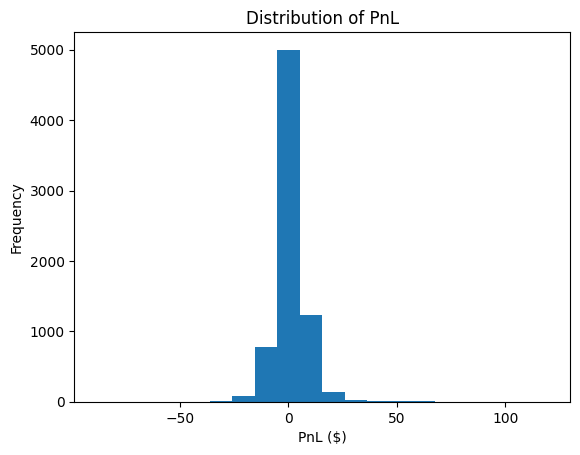

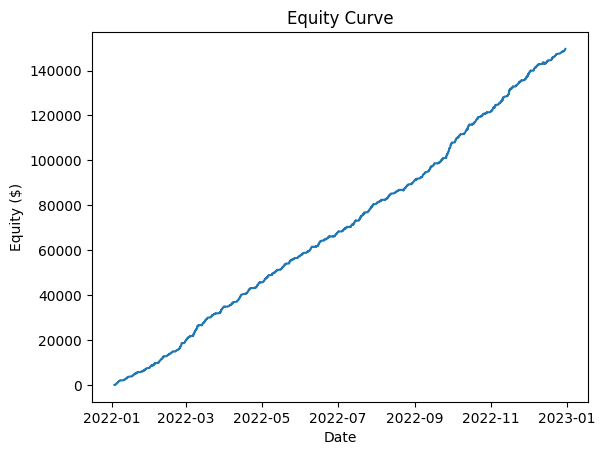

,30d,31d,32d,33d,34d,p49d,49d,buy,pnl,equity,fractal
date,,,,,,,,,,,
2022-01-02 19:13:00,1.13627,1.13625,1.13615,1.13616,1.13620,1.136305,1.13631,True,1.0999,22.2456,1
2022-01-02 19:43:00,1.13631,1.13629,1.13600,1.13608,1.13620,1.136266,1.13596,True,-2.4001,28.6098,1
2022-01-02 21:35:00,1.13442,1.13461,1.13465,1.13462,1.13454,1.134505,1.13434,False,1.6519,39.3658,0
2022-01-03 01:08:00,1.13447,1.13437,1.13429,1.13430,1.13431,1.134388,1.13435,True,0.3999,96.0754,1
2022-01-03 02:15:00,1.13405,1.13391,1.13385,1.13386,1.13389,1.134221,1.13403,True,1.3999,80.7430,1


In [20]:
results = evaluate_model(regressor, X_test, y_test)
results.head()

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Number Winning Trades : 239
Number Losing Trades  : 77
Percent Profitable    : 75.63%
Avg Win Trade         : $3.964
Avg Los Trade         : $-2.494
Largest Win Trade     : $26.400
Largest Los Trade     : $-17.091
Profit Factor         : 4.93


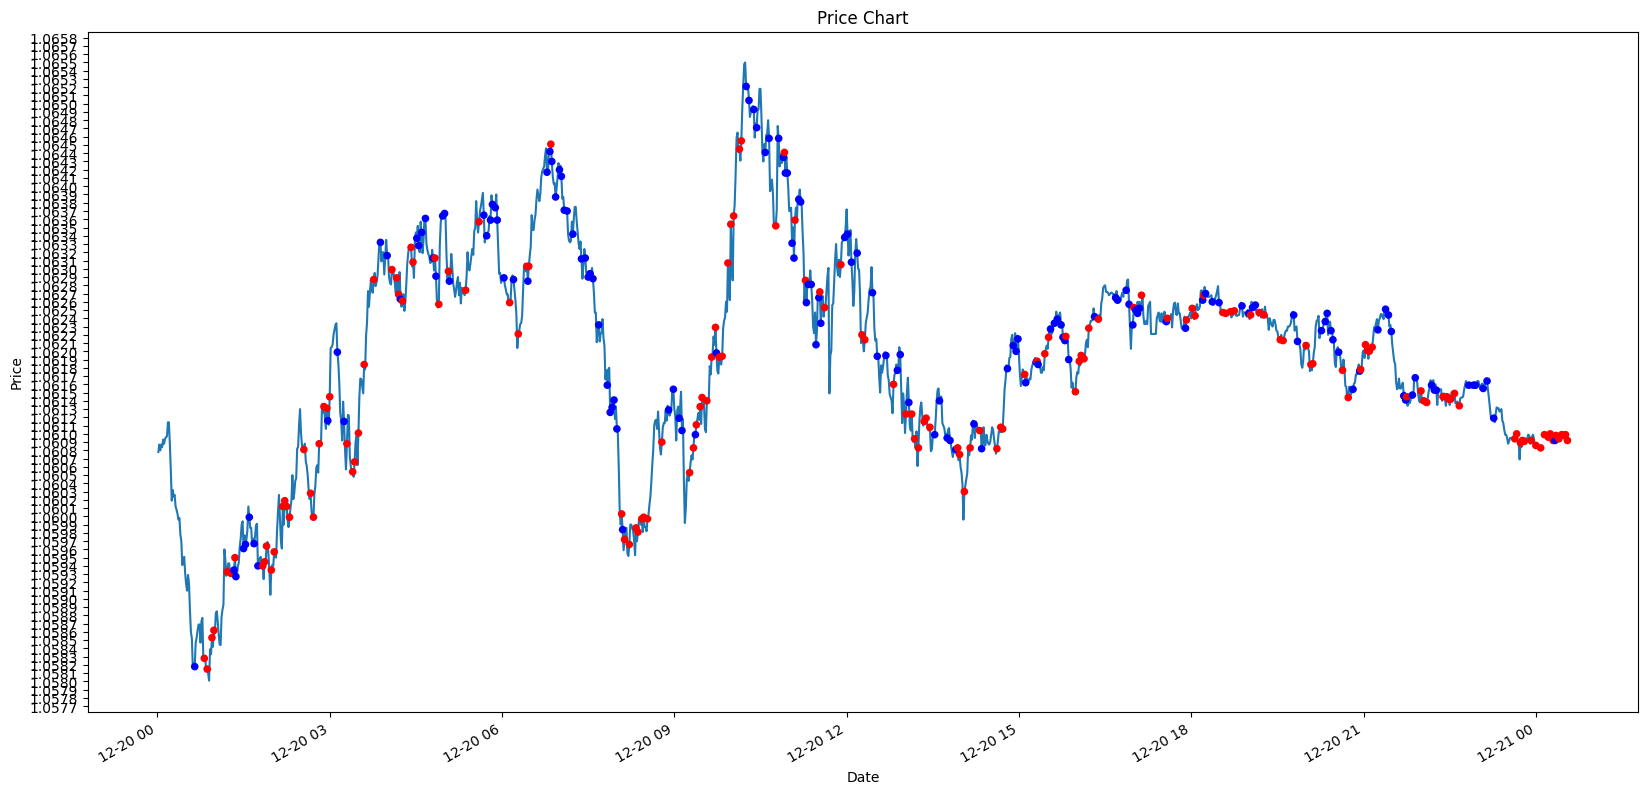

In [125]:
from datetime import datetime, timedelta
def run_simulation_within(df, regressor, start, end):
    df2 = df[np.logical_and(df.index > start, (df.index < end))]
    X2 = df2.iloc[:, :TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH]
    y2 = df2.iloc[:, TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH:]

    results2 = evaluate_model(regressor, X2, y2, show_results=False)

    # plot original data
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(df2["close"], zorder=0)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title("Price Chart")
    fig.autofmt_xdate()

    # add 0.001 notches on y axis
    yticks = ax.get_yticks()
    ax.set_yticks(np.arange(yticks[0], yticks[-1], 0.0001))

    # plot trade points
    TRADE_EXECUTION_TIME = TRAIN_TICK_LENGTH - PREDICT_TICK_LENGTH - 1
    ax.scatter(results2.index + timedelta(minutes=TRADE_EXECUTION_TIME), results2[f"{TRADE_EXECUTION_TIME}d"], c=results2["buy"], cmap="bwr", s=20, zorder=1)
    plt.show()

# show results from 15th may 2022
run_simulation_within(df, regressor, datetime(2022, 12, 20), datetime(2022, 12, 21))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Number Winning Trades : 117
Number Losing Trades  : 191
Percent Profitable    : 37.99%
Avg Win Trade         : $3.349
Avg Los Trade         : $-3.445
Largest Win Trade     : $27.702
Largest Los Trade     : $-34.700
Profit Factor         : 0.60


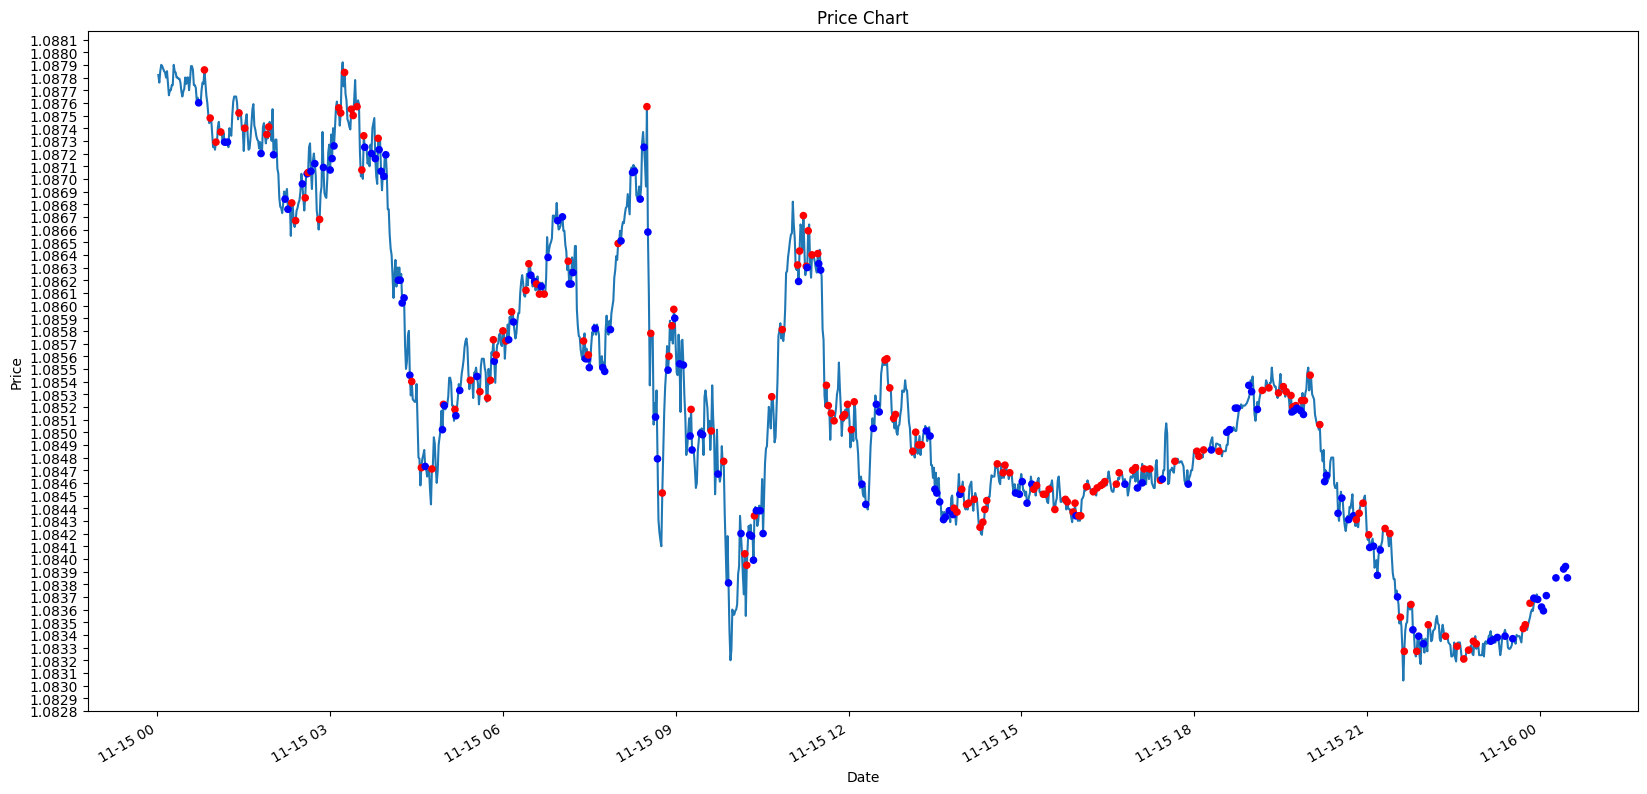

In [126]:
# now run on november 2023
df3 = pandas_data_loader("eurusd/DAT_ASCII_EURUSD_M1_202311/DAT_ASCII_EURUSD_M1_202311.csv")
run_simulation_within(df3, regressor, datetime(2023, 11, 15), datetime(2023, 11, 16))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Number Winning Trades : 121
Number Losing Trades  : 192
Percent Profitable    : 38.66%
Avg Win Trade         : $3.139
Avg Los Trade         : $-3.705
Largest Win Trade     : $13.400
Largest Los Trade     : $-21.887
Profit Factor         : 0.53


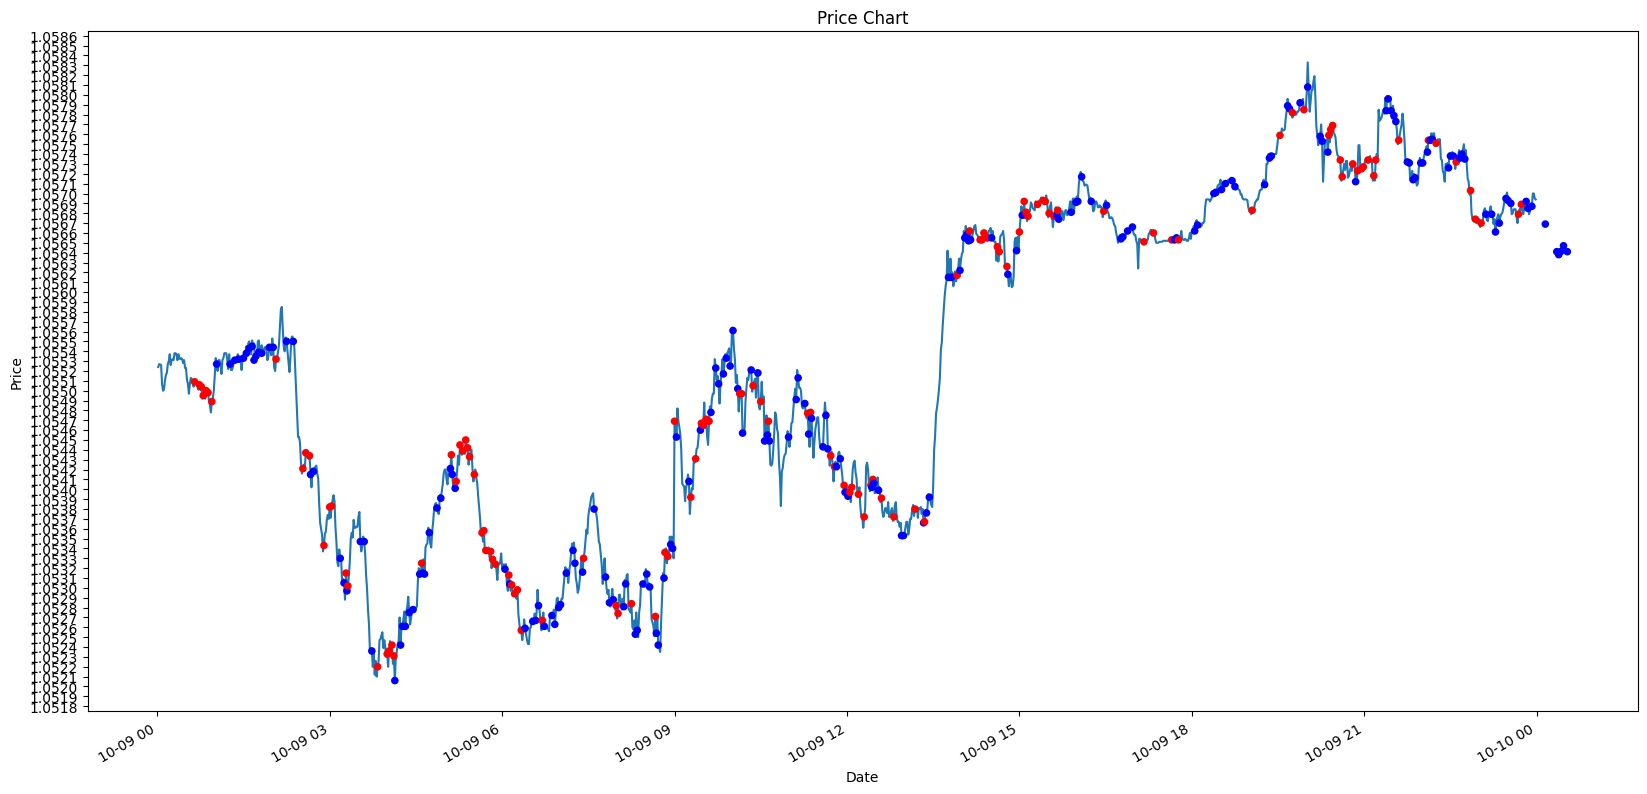

In [127]:
# now run on october 2023
df4 = pandas_data_loader("eurusd/DAT_ASCII_EURUSD_M1_202310/DAT_ASCII_EURUSD_M1_202310.csv")
run_simulation_within(df4, regressor, datetime(2023, 10, 9), datetime(2023, 10, 10))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Number Winning Trades : 129
Number Losing Trades  : 163
Percent Profitable    : 44.18%
Avg Win Trade         : $2.852
Avg Los Trade         : $-3.158
Largest Win Trade     : $18.300
Largest Los Trade     : $-18.391
Profit Factor         : 0.71


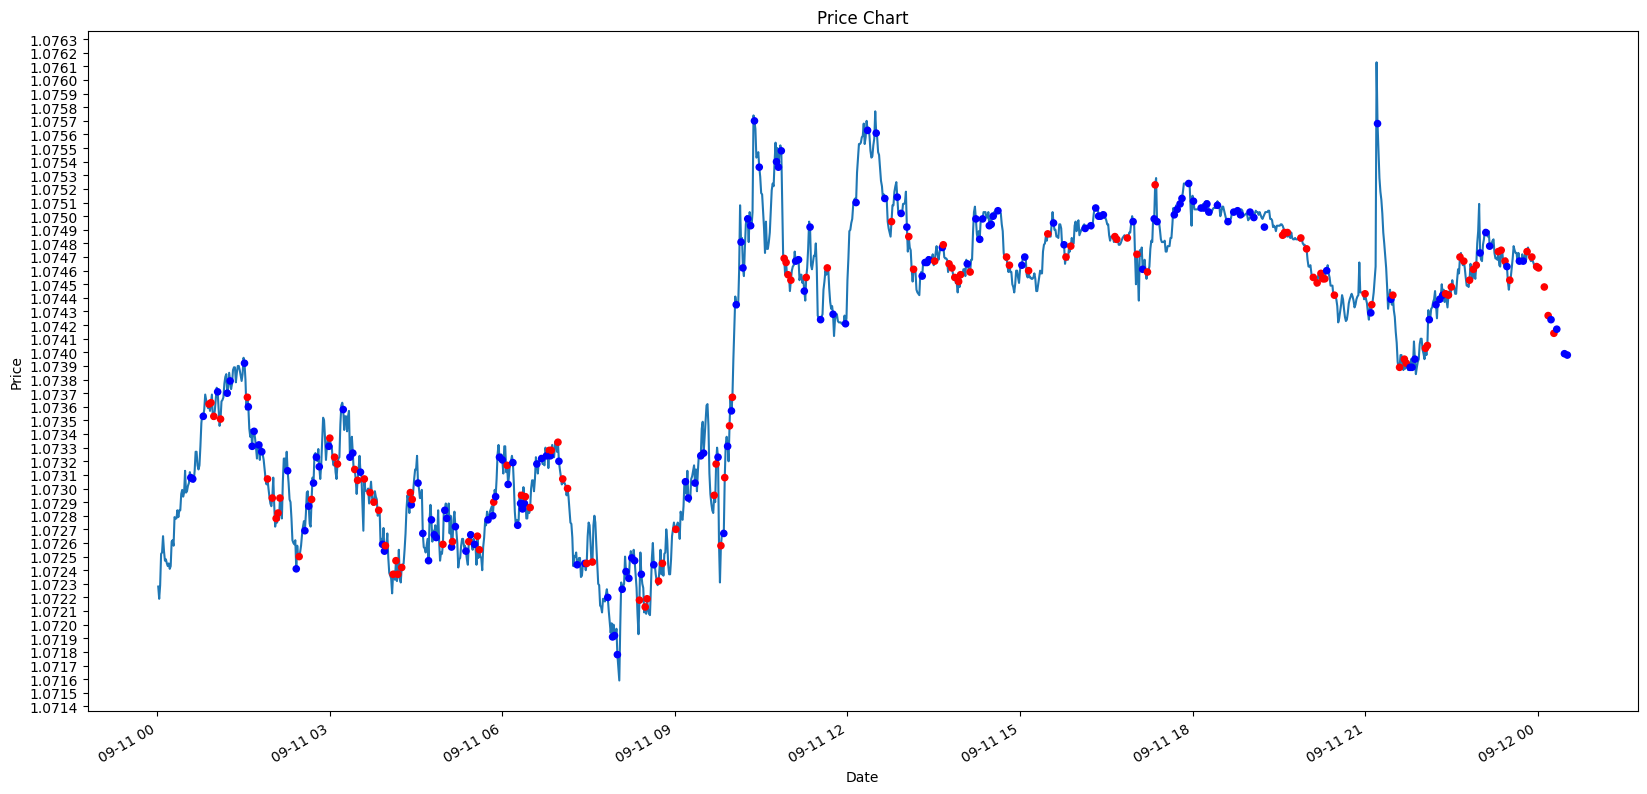

In [133]:
# now run on september 2023
df4 = pandas_data_loader("eurusd/DAT_ASCII_EURUSD_M1_202309/DAT_ASCII_EURUSD_M1_202309.csv")
run_simulation_within(df4, regressor, datetime(2023, 9, 11), datetime(2023, 9, 12))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


Number Winning Trades : 85
Number Losing Trades  : 115
Percent Profitable    : 42.50%
Avg Win Trade         : $3.389
Avg Los Trade         : $-4.484
Largest Win Trade     : $17.362
Largest Los Trade     : $-20.700
Profit Factor         : 0.56


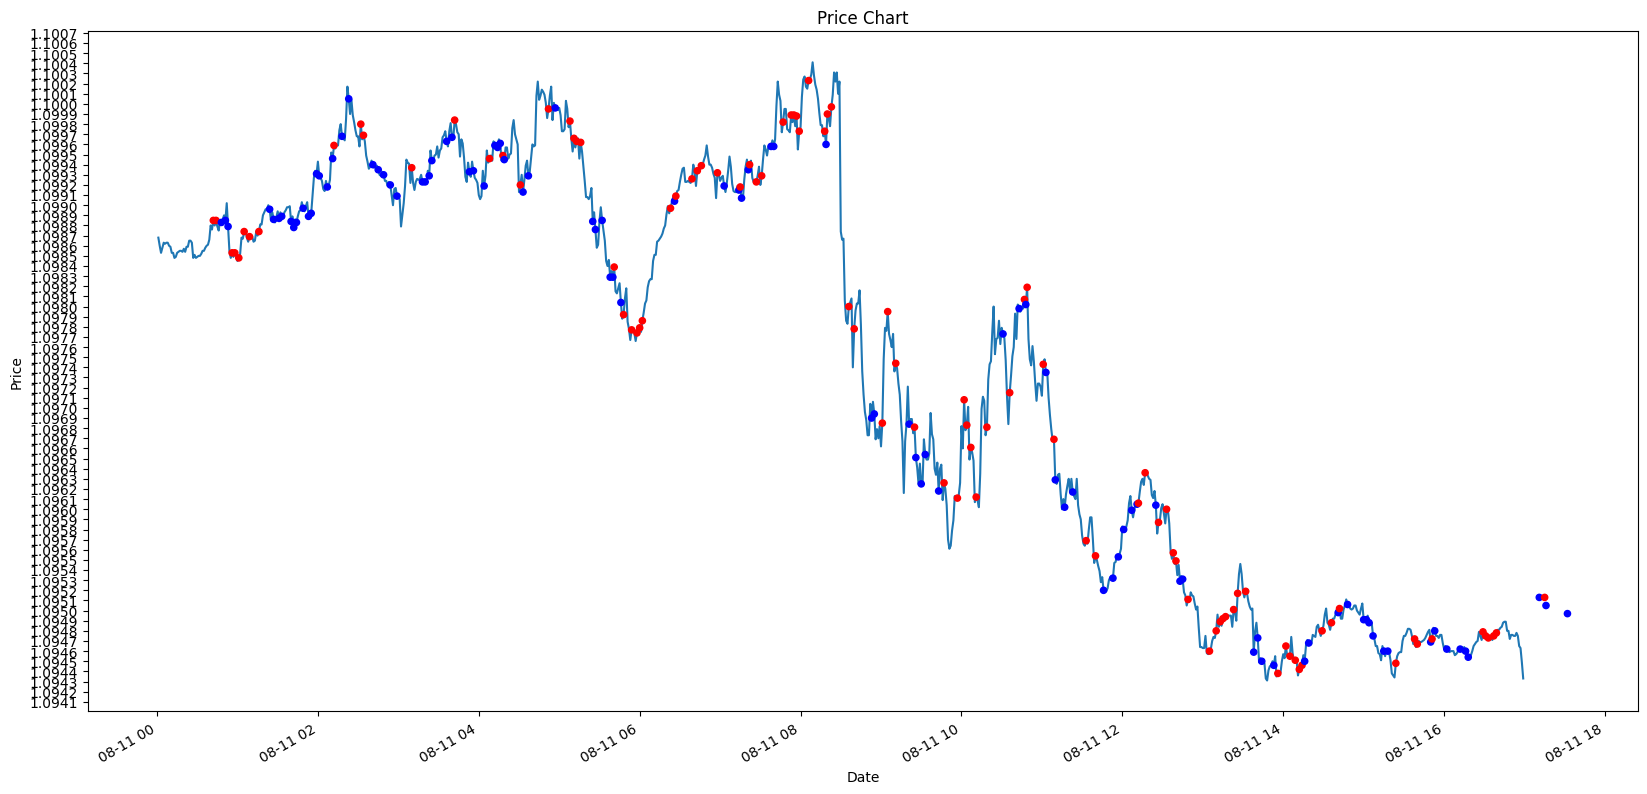

In [134]:
# now run on august 2023
df4 = pandas_data_loader("eurusd/DAT_ASCII_EURUSD_M1_202308/DAT_ASCII_EURUSD_M1_202308.csv")
run_simulation_within(df4, regressor, datetime(2023, 8, 11), datetime(2023, 8, 12))